# РК №2 Новиков Богдан ИУ5-64Б Вариант 13

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

#### Датасет - "FiveThirtyEight Comic Characters Dataset"

https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-comic-characters-dataset

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv("marvel-wikia-data.csv")

In [29]:
data.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


# Предобработка данных

In [30]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [31]:
data.shape

(16376, 13)

In [32]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [33]:
data2 = data.drop(["page_id", "name", "urlslug", "ID", "GSM"], axis=1)

In [34]:
data2.isnull().sum()

ALIGN               2812
EYE                 9767
HAIR                4264
SEX                  854
ALIVE                  3
APPEARANCES         1096
FIRST APPEARANCE     815
Year                 815
dtype: int64

In [35]:
data3 = data2.dropna(axis=0)

In [36]:
data3.isnull().sum()

ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

In [37]:
data3.shape

(4853, 8)

#### Преобразование категориальных значений в числовые

In [38]:
from sklearn.preprocessing import LabelEncoder

leType = LabelEncoder()
le_arr = leType.fit_transform(data3["ALIGN"])
data3["ALIGN"] = le_arr
data3["ALIGN"].unique()
data3 = data3.astype({"ALIGN":"int64"})

leContent = LabelEncoder()
le_arr = leContent.fit_transform(data3["EYE"])
data3["EYE"] = le_arr
data3["EYE"].unique()
data3 = data3.astype({"EYE":"int64"})

leCategory = LabelEncoder()
le_arr = leCategory.fit_transform(data3["HAIR"])
data3["HAIR"] = le_arr
data3["HAIR"].unique()
data3 = data3.astype({"HAIR":"int64"})

leGenres = LabelEncoder()
le_arr = leGenres.fit_transform(data3["SEX"])
data3["SEX"] = le_arr
data3["SEX"].unique()
data3 = data3.astype({"SEX":"int64"})

leSize = LabelEncoder()
le_arr = leSize.fit_transform(data3["ALIVE"])
data3["ALIVE"] = le_arr
data3["ALIVE"].unique()
data3 = data3.astype({"ALIVE":"int64"})

leDate = LabelEncoder()
le_arr = leDate.fit_transform(data3["FIRST APPEARANCE"])
data3["FIRST APPEARANCE"] = le_arr
data3["FIRST APPEARANCE"].unique()
data3 = data3.astype({"FIRST APPEARANCE":"int64"})

/tmp/ipykernel_20758/3856736127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["ALIGN"] = le_arr


In [39]:
data3.shape

(4853, 8)

In [40]:
data3.head()

,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1,8,5,3,1,4043.0,81,1962.0
1,1,3,20,3,1,3360.0,430,1941.0
2,2,3,2,3,1,3061.0,629,1974.0
3,1,3,2,3,1,2961.0,439,1963.0
4,1,3,3,3,1,2258.0,555,1950.0


#### Проведем корреляционный анализ 

<Axes: >

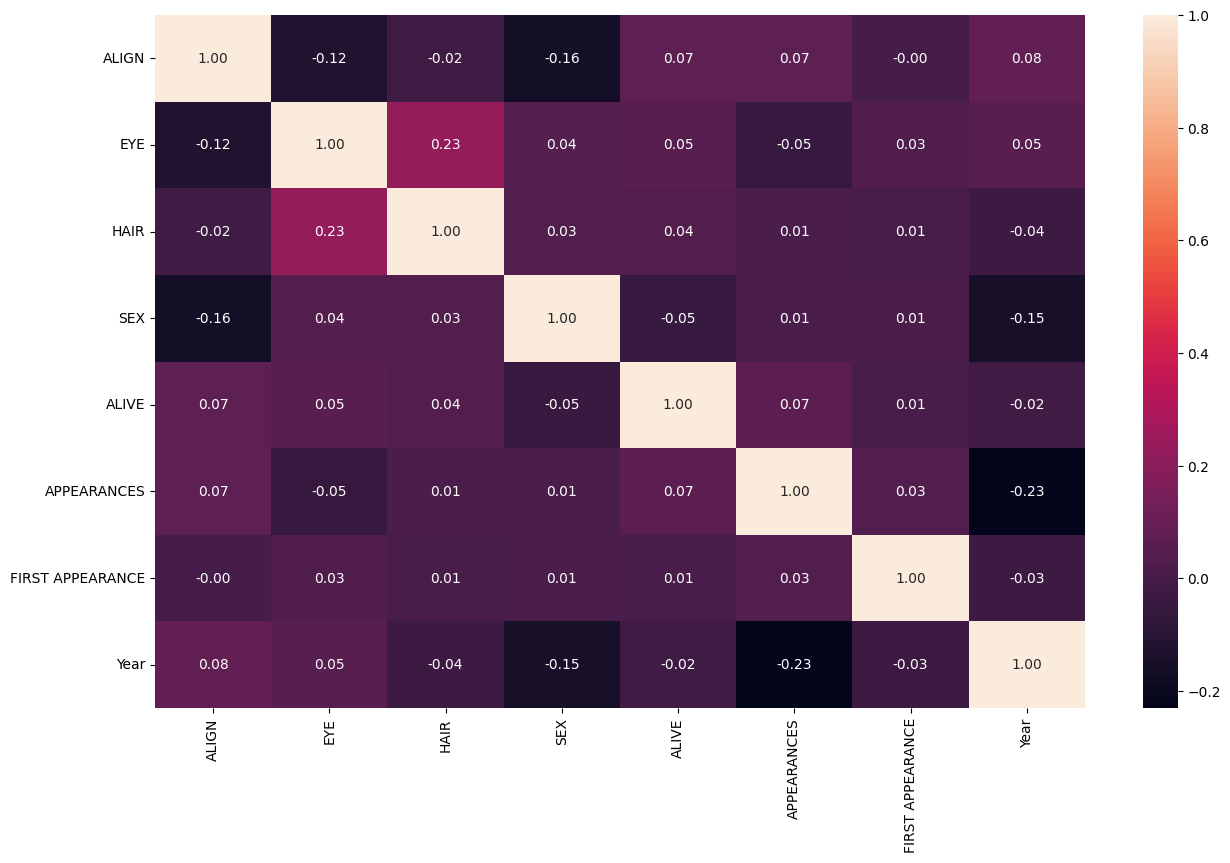

In [41]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data3.corr(method="pearson"), ax=ax, annot=True, fmt=".2f")

#### Проведем проверку на уникальность

In [42]:
data3['ALIVE'].unique()

array([1, 0])

In [43]:
data3['SEX'].unique()

array([3, 1, 2, 0])

In [44]:
data3['ALIGN'].unique()

array([1, 2, 0])

In [45]:
data3['HAIR'].unique()

array([ 5, 20,  2,  3, 11,  4, 15,  1,  0,  8, 17, 14, 18,  7, 16,  6, 12,
       13, 19, 21,  9, 10])

In [46]:
target="ALIGN"
xArray = data3.drop(target, axis=1)
yArray = data3[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия

In [47]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

/home/bogdan/.virtualenvs/data-analyse/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Для оценки качетсва модели будем использовать следующие метрики:

1) Коэффициента детерминации - чтобы определить насколько качественна модель для обучения. Коэффициент детерминации показывает долю вариации результативного признака, находящегося под воздействием изучаемых факторов, т. е. определяет, какая доля вариации признака Y учтена в модели и обусловлена влиянием на него факторов, включенных в модель. Чем ближе к r2 к 1, тем выше качество модели.

2) Корень из средней квадратичной ошибки - чтобы определить разброс ошибок в предсказании модели. RMSE - это способ измерения того, насколько хорошо наша прогностическая модель по сравнению с фактическими данными, чем меньше RMSE, тем лучше способ поведения модели

In [49]:
print("Коэфф. детерминации: {}".format(R2_LR))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_LR))

Коэфф. детерминации: 0.05357845854835053
Среднеквадратическая ошибка (RMSE): 0.5173693332414242


### Градиентный бустинг

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators=10, random_state=1)
GB.fit(trainX, trainY)

GradientBoostingRegressor(n_estimators=10, random_state=1)

In [51]:
R2_GB = r2_score(testY, GB.predict(testX))
RMSE_GB = mean_squared_error(testY, GB.predict(testX), squared=True)

/home/bogdan/.virtualenvs/data-analyse/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
print("Коэфф. детерминации: {}".format(R2_GB))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_GB))

Коэфф. детерминации: 0.04588793677598835
Среднеквадратическая ошибка (RMSE): 0.5215734219559972
